# only compare online or pseudo-online performance

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext snakeviz
%reload_ext cython
import pickle
import pandas as pd 
from pyneurode.spike_sorter import *
import sys
sys.path.append('..\\spikeforest_comparison')
sys.path.append('..\\')


import spikeinterface as si
import spikeinterface.comparison as sc
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.toolkit as st
import spikeinterface.widgets as sw
from tqdm import tqdm
import seaborn as sns 

### Loading previously detected spikes

In [2]:
# load previous collected spikes
print('Loading spike data')
# path = 'D:\Documents\GitHub\spikeforest_comparison\data\df_sort_M1_D20_45_th5.pkl'
path = '../data/df_sort_M1_D20_45_th5.pkl'
with open(path,'rb') as f:
    df_list = pickle.load(f)

df = pd.concat(df_list)   
df.reset_index() #make sure no index has duplicates

# Save the online cluster id to another column
df.rename(columns={'cluster_id':'cluster_id_online'},inplace=True)
# df

Loading spike data


### Clusting-TM split

In [3]:

# %% Sorting spikes
print('Sorting spikes')
training_spikes = 20000
df_sort = df.loc[:, ['spike_waveform','time','electrode_ids','channel_ids','spike_id','timestamps','acq_timestamps']] # remove other columns

# train template
df_train,pca_transformer,standard_scalers = sort_all_electrodes(df_sort.iloc[:training_spikes].copy(), pca_component=3, verbose=True) #sort spikes

(templates, template_cluster_id, template_electrode_id) = generate_spike_templates(df_train)
print(f'Number of template {len(templates)}')

# template match all subsequent neurons
df_sortc = df_sort.copy()

Sorting spikes
Aligning spikes
Sorting electrode 1
use normalized pc
Sorting electrode 2
use normalized pc
Sorting electrode 0
use normalized pc
Sorting electrode 3
use normalized pc
Number of template 14


### Measure performance

In [11]:
%timeit df_matched = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)

6.82 s ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
df_matched = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id, pca_transformer, standard_scalers)

In [8]:
%timeit df_matched = template_match_all_electrodes(df_sortc, templates, template_electrode_id, template_cluster_id,pca_transformer, standard_scalers)

16.6 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
sorted_df = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)
sorted_df

,spike_waveform,time,electrode_ids,channel_ids,spike_id,timestamps,acq_timestamps,cluster_id,spike_waveform_aligned,sorting_time,pc_norm
0,"[-0.05250948, -0.14332052, -0.022488609, 0.048...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,375862,1.615648e+09,C1_5,"[0.048003923147916794, -0.21444782614707947, -...",0.000418,None
1,"[-0.5246422, -0.609553, -0.35305232, -0.039588...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,376256,1.615648e+09,C1_2,"[-0.039588578045368195, -0.12017491459846497, ...",0.000180,None
2,"[-0.45728362, 0.3922822, 0.60337937, 0.3992793...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,376899,1.615648e+09,C1_3,"[0.3992793560028076, -0.10937236249446869, -0....",0.000158,None
3,"[0.46189496, 1.5869086, 1.8508329, 1.4992404, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,377838,1.615648e+09,C2_1,"[1.4992403984069824, 1.132098913192749, 0.6527...",0.000112,None
4,"[0.909833, 0.2761541, 0.17282563, 0.516779, 1....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,377887,1.615648e+09,C1_2,"[0.5167790055274963, 1.1071397066116333, 1.749...",0.000123,None
...,...,...,...,...,...,...,...,...,...,...,...
10,"[0.06949595, 0.29736862, 0.81068987, 1.116027,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10,9118576,1.615648e+09,C0_3,"[1.1160269975662231, 0.888058602809906, 0.3635...",0.000083,None
11,"[0.16372728, -0.009656481, 0.16306406, -0.3709...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,9118598,1.615648e+09,C2_2,"[-0.3709728717803955, -1.4567493200302124, -1....",0.000083,None
12,"[-0.8042053, -0.5876875, 0.13034075, 0.6422738...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12,9118667,1.615648e+09,C1_5,"[0.6422738432884216, 0.7085359692573547, 0.359...",0.000084,None
13,"[-0.020245934, 1.4837929, 1.8430108, 1.3749459...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,9118788,1.615648e+09,C3_1,"[1.374945878982544, 0.7906058430671692, 0.8324...",0.000085,None


<AxesSubplot:xlabel='sorting_time', ylabel='Count'>

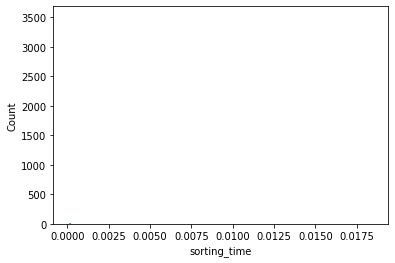

In [6]:
# sorted_df.sorting_time.hist(bins=100)
sns.histplot(x='sorting_time',data=sorted_df)

In [19]:
%snakeviz template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)

 
*** Profile stats marshalled to file 'C:\\Users\\teristam\\AppData\\Local\\Temp\\tmpxtet3l3i'. 
Embedding SnakeViz in this document...


### Testing Cython integration

In [4]:
from pyneurode.spike_sorter import align_spike as align_spike_py

In [5]:
spikewaveform = np.stack(df_sort.spike_waveform.to_numpy())

In [6]:
%timeit align_spike_py(spikewaveform)

445 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [95]:
%%cython -a
# cython: infer_types=True

import numpy as np 
cimport numpy as np
cimport cython 

@cython.boundscheck(False)
@cython.wraparound(False)
def align_spike_cy(spikes, int chan_per_electrode=4, int search_span = 15, int pre_peak_span=15, int post_peak_span = 15,
    int align_sign=-1):
    # align spikes to max absolute spike
    # spikes is in the form (index x time), if it is from tetrode, then the waveform of all channel should be already concatenated in the time axis
    # it finds the maximum point along the time axis, then shift all channel in the tetrode such that maximum is at the centre
    #TODO: potential racing condition when spike from two channel are of similar height
    
  

    assert spikes.ndim == 2, 'Spikes must be a 2d array'
    assert spikes.dtype == np.float32, 'Spike datatype must be np.float32'
        
    cdef int nspikes, spike_total_length
    nspikes = spikes.shape[0]
    spike_total_length = spikes.shape[1]

    if align_sign == -1:
        # only align to the negative peaks
        spikes2 = spikes.copy()
        spikes2[spikes2>0] = 0
    else:
        spikes2 = spikes
    
    abs_spike = np.abs(spikes2)
    
    cdef int spike_length # length of each waveform
    spike_length = spikes.shape[1]//chan_per_electrode
    
    #Create a mask to restrict the search region
    # set the signal output the mask to be zero
    mask = np.zeros_like(abs_spike)
    search_region = [np.arange(spike_length/2-search_span,spike_length/2+search_span)
        +i*spike_length for i in range(chan_per_electrode) ]
    search_region = np.concatenate(search_region).astype(int)
    mask[:,search_region] = 1

    #only search the masked region
    masked_spike = abs_spike*mask 

    peak_idx = masked_spike.argmax(axis=1)


    # find out which channel it is 
    chan_idx = peak_idx//spike_length
    idx_rel_chan = peak_idx%spike_length #index of peak within that channel
    
    cdef long long [:] idx_rel_chan_memview
    idx_rel_chan_memview = idx_rel_chan
    
    cdef np.float32_t [:,:,:] spikes_channel_memview
    cdef np.float32_t [:,:,:] spikes_aligned_memview
    spikes_channel = spikes.reshape(-1,chan_per_electrode,spike_length) # n x time x channel
    spikes_aligned = np.zeros((spikes.shape[0],
                               chan_per_electrode, (pre_peak_span+post_peak_span)),
                             dtype=np.float32)
    
    # use memory view to speed up computation
    spikes_channel_memview = spikes_channel
    spikes_aligned_memview = spikes_aligned
    

    # align each channel
    # pad the aligned signal with zero if the peak is too skewed to one side
    
    cdef int i, idx
    
    for i in range(nspikes):
        idx = idx_rel_chan_memview[i]
        
        start_idx = max(idx-pre_peak_span,0) #first half of spike
        end_idx =  min(idx+post_peak_span, spike_length) #second half of spike
        
        #make sure the peak is aligned at the centre
        copy_len = (end_idx-start_idx)
        
        # take care of the case when copy_len is odd
        first_half_length = idx-start_idx
        second_half_length = end_idx-idx
        spikes_aligned_memview[i,:, (pre_peak_span-first_half_length):(pre_peak_span+second_half_length)] = spikes_channel_memview[i, :, start_idx:end_idx]
        
    return spikes_aligned.reshape(nspikes,-1)

In [96]:
%timeit align_spike_cy(spikewaveform)

114 ms ± 4.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
%prun -l 10 align_spike_cy(spikewaveform)

         18 function calls (16 primitive calls) in 0.119 seconds

   Ordered by: internal time
   List reduced from 15 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.114    0.114    0.118    0.118 {_cython_magic_defb9fea4e6e19d90e9ac3953db72b37.align_spike_cy}
      4/2    0.004    0.001    0.004    0.002 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.001    0.001    0.119    0.119 <string>:1(<module>)
        1    0.000    0.000    0.119    0.119 {built-in method builtins.exec}
        1    0.000    0.000    0.004    0.004 <__array_function__ internals>:2(zeros_like)
        1    0.000    0.000    0.004    0.004 numeric.py:75(zeros_like)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.004    0.004 <__array_function__ internals>:2(copyto)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(

In [97]:
np.allclose(align_spike_cy(spikewaveform),align_spike_py(spikewaveform))

True